In [3]:
import os

def read_data(filename, encoding='cp949'):               # 읽기 함수 정의
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]                                      # txt 파일의 헤더(id document label)는 제외하기
  return data

data = read_data('C:\\Users\\LeeKyoungJun\\Desktop\\데이터캠퍼스\\pytest_대용량\\ratings.txt', encoding='cp949')

In [4]:
# 전처리(형태소 분석, 라벨 컬럼만 자르기)

import rhinoMorph
rn = rhinoMorph.startRhino()

data_text = [line[1] for line in data]      # 데이터 문장
data_senti = [line[2] for line in data]     # 데이터 긍부정 부분

# 전체 데이터 형태소 분석
morphed_data = ''
for data_each in data_text : 
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)        # 문자열을 하나로 연결
    if joined_data_each :                                  # 내용이 있는 경우만 저장하게 함
        morphed_data += joined_data_each+"\n"


filepath:  C:\Anaconda3\lib\site-packages
classpath:  C:\Anaconda3\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [5]:
# 형태소 데이터 저장, f.write 안에는 리스트가 아닌 스트링이 들어가야 한다

# with open('C:/Users/LeeKyoungJun/Desktop/morphed_data.txt', 'w', encoding='cp949') as f:
#     f.write(morphed_data)

In [6]:
# Data Tokenizing(텍스트에 사용된 단어의 종류를 빈도 순으로 정렬하는 작업을 수행)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

# str을 리스트로 만들기. tokenizer를 사용하려면 리스트 형식이어야 한다.
morphed_data_list = morphed_data.split('\n')

# 메모리 부족으로 전체 데이터가 돌아가지 않음. 현재 10만건까지는 돌아감
print("훈련시킬 데이터의 양을 입력(전체 데이터 행 : %s)" % len(morphed_data_list))
slice_val = int(input())

morphed_data_list_sliced = morphed_data_list[:int(slice_val/2)] + morphed_data_list[int(-(slice_val/2)):]
data_senti_sliced = data_senti[:int(slice_val/2)] + data_senti[int(-(slice_val/2)):]

validation_ratio = math.floor(len(data) * 0.3)  # 검증 샘플은 전체의 30%로 한다
max_words = 10000                       # 데이터셋에서 가장 빈도 높은 10,000 개의 단어만 사용한다
maxlen = 200                            # 항상 200 단어가 되도록 길이를 고정한다

tokenizer = Tokenizer(num_words=max_words)  # 상위빈도 10,000 개의 단어만을 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(morphed_data_list_sliced) # 단어 인덱스를 구축. 리스트 넣어야 함

# 단어 인덱스만 가져온다. word_index에는 설정한 max_words와는 관련없이 수집한 모든 형태소를 넣음.
# word_index는 max_words와 관련이 아예 없는 듯함
word_index = tokenizer.word_index          

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

훈련시킬 데이터의 양을 입력(전체 데이터 행 : 197743)
80000


In [ ]:
# Tokenizing 결과 확인

print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type: ', type(word_index))
# print('word_index: ', word_index)

In [ ]:
# Data Sequencing(문자를 숫자로 변환하는 작업)

# 상위 빈도 10,000(max_words)개의 단어만 추출하여 word_index의 숫자 리스트로 변환
data_seq = tokenizer.texts_to_sequences(morphed_data_list_sliced) # Tokenizer 결과가 여기서 반영

print('len(data_seq):', len(data_seq))
print('data_seq[0]:', data_seq[0])
print('morphed_data_list_sliced[0]:', morphed_data_list_sliced[0])           # texts[0]의 본래 단어들

In [9]:
# Data Pading
data_pad = pad_sequences(data_seq, maxlen=maxlen) 

print('<data_pad>\n', data_pad)
print('\n<data_pad[0]>\n', data_pad[0])
print('len(data_pad) : ', len(data_pad[0]))
# print('word index : ', word_index)

<data_pad>
 [[   0    0    0 ...    2    6    5]
 [   0    0    0 ...  660   10  418]
 [   0    0    0 ... 2924    4   19]
 ...
 [   0    0    0 ...    2  101    5]
 [   0    0    0 ... 1890 9302  660]
 [   0    0    0 ...    0    0    0]]

<data_pad[0]>
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  

In [10]:
# One Hot Encoding(max_words에 맞게 컬럼(디멘션) 프레임을 생성하고 피쳐별 존재하는 단어를 1로 만듬)

def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data_one_hot = to_one_hot(data_pad, dimension=max_words)
labels = np.asarray(data_senti_sliced).astype('float32') # 레이블 형식을 리스트에서 배열로 바꿔 2D 텐서로 만듬

In [11]:
# One-Hot-Encoding 결과 확인
print('<data_one_hot>\n', data_one_hot)
print('len(data_one_hot[0]) : ', len(data_one_hot[0])) # dimension=10000으로 했으므로 각 컬럼은 10,000개를 가지고 있다
print('<data_one_hot [0][0:100]>\n', data_one_hot[0][0:100])

print(word_index)

<data_one_hot>
 [[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
len(data_one_hot[0]) :  10000
<data_one_hot [0][0:100]>
 [1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
{'영화': 1, '보다': 2, '하다': 3, '없다': 4, 'ㅋㅋ': 5, '재미있다': 6, '좋다': 7, '너무': 8, '되다': 9, '있다': 10, '나': 11, '정말': 12, '이': 13, '진짜': 14, '같다': 15, '만들다': 16, '이것': 17, '연기': 18, '최고': 19, '나오다': 20, '평점': 21, 'ㅋ': 22, '다': 23, '왜': 24, '알다': 25, '안': 26, '잘': 27, '이런': 28, '스토리': 29, '더': 30, '드라마': 31, '주다': 32, '사람': 33, '때': 34, '그': 35, '뭐': 36, '지루': 37, '생각': 38, '내용': 39, '좀': 40, '아깝다': 41, '그냥': 42, '감독': 43, '재미': 44, '말': 45, '시간': 46, '재미없다': 47, 'ㅠㅠ': 4

In [12]:
# 데이터와 레이블 텐서를 셔플함

print('데이터 텐서의 크기:', data_one_hot.shape)  # (slice_val, max_words)
print('레이블 텐서의 크기:', labels.shape)  # (slice_val,)

indices = np.arange(data_one_hot.shape[0])        # 0 ~ 24999 까지의 숫자를 생성
np.random.shuffle(indices)                        # 0 ~ 24999 까지의 숫자를 랜덤하게 섞음
data_one_hot = data_one_hot[indices]              # 이것을 인덱스로 하여 2D 텐서 데이터를 섞음 
labels = labels[indices]                          # label도 같은 순서로 섞음 

print(indices)

데이터 텐서의 크기: (80000, 10000)
레이블 텐서의 크기: (80000,)
[77528 29422 21117 ...  5469 44625 41613]


In [13]:
# 훈련데이터와 검증데이터 분리

x_train = data_one_hot[validation_ratio:]   # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:] # 훈련데이터의 70%를 훈련데이터 Label (data와 labels는 같은 순서)
x_val = data_one_hot[:validation_ratio]     # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio]   # 훈련데이터의 30%를 검증데이터 Label

In [14]:
# 모델 정의하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()                                              # 모델을 새로 정의

model.add(Dense(64, activation='relu', input_shape=(max_words,))) # 첫 번째 은닉층
model.add(Dense(32, activation='relu'))                           # 두 번째 은닉층
model.add(Dense(1, activation='sigmoid'))                         # 출력층

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
# 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile & Train Model
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

epochs_val = 4

# 모델 훈련
history = model.fit(x_train, y_train, epochs = epochs_val, batch_size=32, validation_data=(x_val, y_val))
history_dict = history.history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 60000 samples
Epoch 1/4
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.4559 - acc: 0.7932 - val_loss: 0.4089 - val_acc: 0.8172
Epoch 2/4
20000/20000 [==============================] - 29s 1ms/sample - loss: 0.3603 - acc: 0.8444 - val_loss: 0.4113 - val_acc: 0.8170
Epoch 3/4
20000/20000 [==============================] - 28s 1ms/sample - loss: 0.3375 - acc: 0.8565 - val_loss: 0.4104 - val_acc: 0.8217
Epoch 4/4
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.3223 - acc: 0.8659 - val_loss: 0.4121 - val_acc: 0.8232


In [17]:
# Save Model
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다

save_folder = '영화 감성분석/'
save_path = 'C:/py_temp/자연어처리/모델/' + save_folder + str(slice_val) + '_' + str(epochs_val) + '번 epochs_'

model.save(save_path  + 'text_binary_model.h5')

# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다
import pickle
with open(save_path + 'text_binary_tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
# Accuracy & Loss 확인
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc) # [0.79, 0.90, 0.93, 0.94, 0.96, 0.97, 0.98, 0.98, 0.98, 0.99]
epochs = range(1, len(acc) +1)       # range(1, 11)

Accuracy of each epoch: [0.7932, 0.84445, 0.8565, 0.86595]


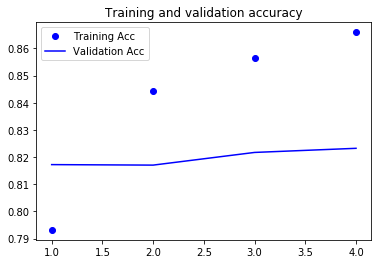

In [19]:
# Plotting Accuracy
import matplotlib.pyplot as plt

# 훈련데이터의 정확도에 비해 검증데이터의 정확도는 낮게 나타난다
# epoch가 높아지면 모델은 훈련데이터에 매우 민감해져 오히려 새로운 데이터를 잘 못 맞춘다
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

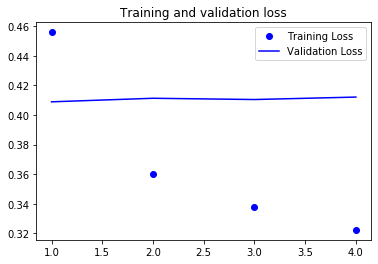

In [20]:
# Plotting Loss
plt.figure()    # 새로운 그림을 그린다

# 훈련데이터의 손실값은 낮아지나, 검증데이터의 손실값은 높아진다
# 손실값은 오류값을 말한다. 예측과 정답의 차이를 거리 계산으로 구한 값이다
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# Load Model
from tensorflow.keras.models import load_model

loaded_model = load_model('C:/py_temp/자연어처리/모델/영화 감성분석/70000_4번 epochs_text_binary_model.h5')
print("model loaded:", loaded_model)

with open('C:/py_temp/자연어처리/모델/영화 감성분석/70000_4번 epochs_text_binary_tokenizer.pickle', 'rb') as handle:
  loaded_tokenizer = pickle.load(handle)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000189EC773F48>


In [ ]:
# Test Data Loading
# test_dir = os.path.join(imdb_dir, 'test')
labels = [] ; texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join('C:/Users/LeeKyoungJun/Desktop/데이터캠퍼스/pytest_대용량/aclImdb/test', label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
# Data 확인
print('texts:', texts[0])
print('texts len:', len(texts))

In [ ]:
# Data Sequencing
# 문자열을 word_index의 숫자 리스트로 변환
data = loaded_tokenizer.texts_to_sequences(texts)

# padding으로 문자열의 길이를 고정시킨다
data = pad_sequences(data, maxlen=maxlen) 

# test 데이터를 원-핫 인코딩한다
x_test = to_one_hot(data, dimension=max_words)

# label을 list에서 넘파이 배열로 변환. 결과가 0 또는 1만 나오므로 이와같이 int32로 저장해도 된다.
y_test = np.asarray(labels)

In [ ]:
# Test Data Evaluation
test_eval = loaded_model.evaluate(x_test, y_test)  # 모델에 분류할 데이터와 그 정답을 같이 넣어준다
print('prediction model loss & acc:', test_eval)   # 모델이 분류한 결과와 입력된 정답을 비교한 결과

In [ ]:
# 1개 데이터 예측
text = ["Hi, this is a test sentence."]      # 데이터를 list 타입으로 만든다
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)

prediction = loaded_model.predict(x_test)
print("Result:", prediction)					       # [[0.53135556]]. 1이 될 확률이 53.1%